In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("breast-cancer.csv")  

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.drop(columns=['id'], inplace=True)

In [5]:
# Convert 'diagnosis' column: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])


In [6]:
df[['diagnosis']].value_counts()

diagnosis
0            357
1            212
Name: count, dtype: int64

In [9]:
X = df[['radius_mean', 'texture_mean']].values
y = df['diagnosis'].values 

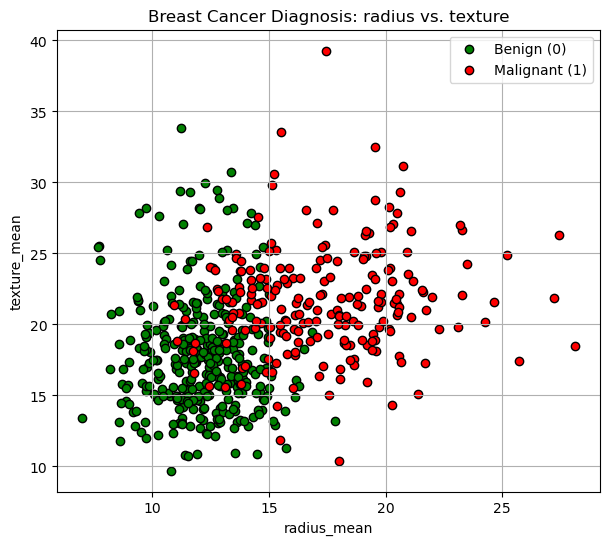

In [10]:
plt.figure(figsize=(7, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='green', label='Benign (0)', edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Malignant (1)', edgecolor='k')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('Breast Cancer Diagnosis: radius vs. texture')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

SVC()

In [15]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

In [16]:
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear SVM Accuracy: {acc_linear:.4f}")
print(f"RBF SVM Accuracy: {acc_rbf:.4f}")

Linear SVM Accuracy: 0.9035
RBF SVM Accuracy: 0.9211


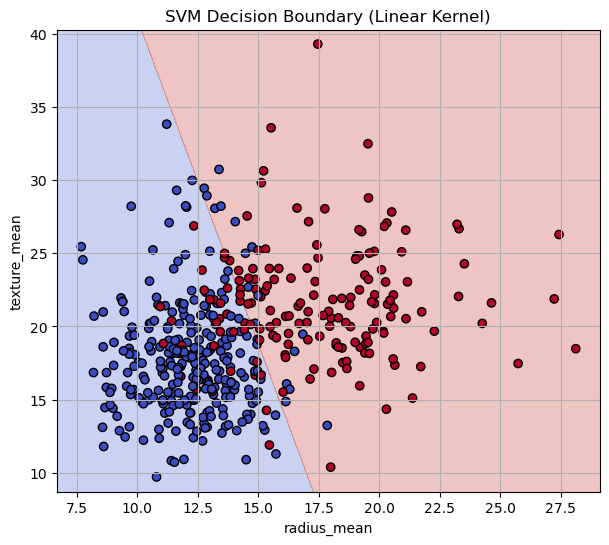

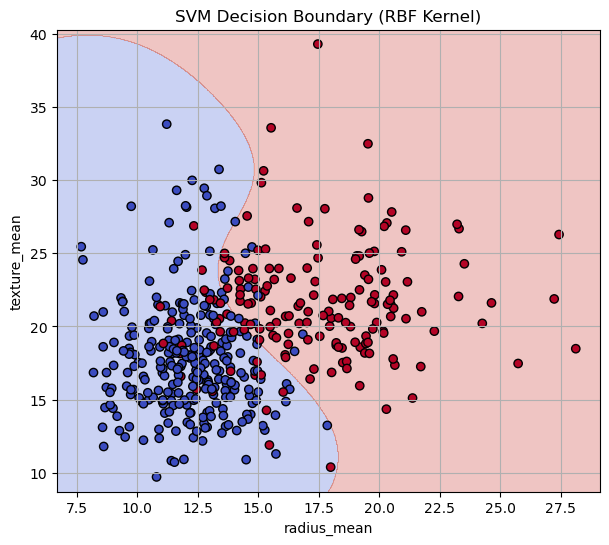

In [26]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict values for mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot for Linear SVM
plot_decision_boundary(svm_linear, X_train, y_train, "SVM Decision Boundary (Linear Kernel)")

# Plot for RBF SVM
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM Decision Boundary (RBF Kernel)")

In [28]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}


In [29]:
# Set up Grid Search with 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [30]:
# Best parameters and score
print(" Best Parameters:", grid.best_params_)
print(" Best Cross-Validation Accuracy:", grid.best_score_)

 Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
 Best Cross-Validation Accuracy: 0.9054945054945055


In [31]:
# Evaluate on test data
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("\n Classification Report on Test Set:\n", classification_report(y_test, y_pred))


 Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

